<a href="https://colab.research.google.com/github/Salstek22/project/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B3%D0%BE_%D0%B2%D0%B5%D0%B1_%D1%81%D0%B5%D1%80%D0%B2%D0%B5%D1%80%D0%B0_%D0%B8_%D0%BD%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B0_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%7C_%D0%94%D0%97_Ultra_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Найдите любой другой сервис, подходящий для развертывания моделей и реализуйте произвольную задачу (разбор данного задания будет осуществлен на сервисе https://anvil.works/ для задачи классификации базы Ирисов)

P.s. вы можете взять любой другой сервис и любую другую задачу

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 
import zipfile
from PIL import Image 

# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from tensorflow.keras.models import load_model
# Загрузим в Colab предварительно обученный и сохраненный на локальном диске файл с весами модели:
MODEL_NAME =   'model_mnist.h5'
model = load_model(MODEL_NAME)

In [ ]:
!unzip -qo test_images.zip

In [ ]:
# Просмотр тестового изображения

# Путь к файлу изображения
test_path = '/content/test_images/9.png'  
img = Image.open(test_path)

# Вывод изображения на экран 
display(img)   

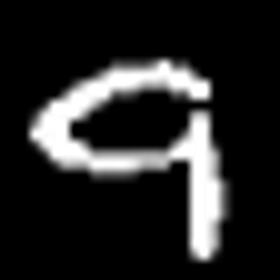

In [ ]:
resized_image = img.resize((INPUT_SHAPE[1], INPUT_SHAPE[0]))  
# Вывод изображения на экран 
display(resized_image)


In [ ]:
# Подготовка для классификации
img1=np.array(img)[np.newaxis, ..., np.newaxis]
img1.shape

(1, 28, 28, 1)

In [ ]:
# Применяем сеть для распознавания новой моей цифры
prediction = model.predict(img1) 

In [ ]:
# Решение модели
np.argmax(prediction), prediction[0,np.argmax(prediction)]

(9, 1.0)

In [ ]:
# модуль с функцией распознавания
mnist_file = '''

from tensorflow.keras.models import load_model
MODEL_NAME =   'model_mnist.h5'
import numpy as np
from PIL import Image 
model = load_model(MODEL_NAME)                                              # Загрузка  модели с обученными весами
INPUT_SHAPE = (28, 28, 1)


def process(image_file):
    image = Image.open(image_file)                                          # Открытие обрабатываемого файла
    #resized_image = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0]))
    array1 = np.array(image)[np.newaxis, ..., np.newaxis]                     # Регулировка формы тензора для подачи в сеть
    prediction = model.predict(array1)                                       # Запуск предсказания сети
    result=np.argmax(prediction)
    return result, prediction
'''

with open('ml_mnist.py', 'w') as file:
    file.write(mnist_file)

In [ ]:
# импорт модуля
import ml_mnist
import matplotlib.pyplot as plt

In [ ]:
# проверим работу функции

result = ml_mnist.process('/content/test_images/3.png')
m=str(result[0])
print(m, type (m))

3 <class 'str'>


In [ ]:
# Создадим файл приложения (формы):
app_file = '''
import streamlit as st
from PIL import Image 
from ml_mnist import process
OUTPUT_SHAPE = (28*4, 28*4, 1)

st.title('Digit recognition')

image_file = st.file_uploader('Load an image', type=['png', 'jpg'])  

if not image_file is None: 
    col1, col2 = st.beta_columns(2)                                
    image = Image.open(image_file) 
    #image=image.resize((28, 28))
    results = process(image_file)  
    image1=image.resize((OUTPUT_SHAPE[1], OUTPUT_SHAPE[0]))
    col1.subheader('Source image')
    col1.image(image1)                                          
    col2.subheader('Network prediction: ')
    col2.subheader(str(results[0]))
    
    st.subheader('Probability estimate: ')    
    st.bar_chart(results[1][0])

'''

with open('app.py', 'w') as file:
    file.write(app_file)

In [ ]:
# Создадим файл конфигурации Streamlit:
setup_file = '''

mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

'''

with open('setup.sh', 'w') as file:
    file.write(setup_file)

In [ ]:
# Создадим командный файл для запуска сервиса:
proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
    file.write(proc_file)

In [ ]:
# Создадим файл требований необходимых пакетов:
requirements_file = '''

streamlit==0.82.0
tensorflow-cpu==2.5.0

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
# Удалим лишние файлы, находящиеся в текущей папке в Colab по умолчанию:
!rm -rf sample_data

In [1]:
# Выполним начальную настройку Git: зададим имя пользователя и e-mail. 
!git config --global user.email "salstek22@gmail.com"
!git config --global user.name "salstek22"

In [2]:
# Установим инструменты командной строки Heroku CLI (Command Line Interface):
!curl https://cli-assets.hostman.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: cli-assets.hostman.com


In [ ]:
# Установим инструменты командной строки Heroku CLI (Command Line Interface):
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0   8438      0 --:--:-- --:--:-- --:--:--  8438
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
+ apt-get install -y apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100  5393  100  5393    0     0  23145      0 --:--:-- --:--:-- --:--:-- 23145
+ apt-get update
+ apt-get install -y heroku
 ›   Warning: Our terms of service have changed: 
 ›   https://dashboard.heroku.com/t

In [ ]:
# Проверим правильность установки:
!heroku --version

heroku/7.59.2 linux-x64 node-v12.21.0


In [ ]:
# Авторизация в Heroku
LOGIN = 'salstek22@gmail.com'  # мой логин
API_KEY = '1f5f71ae-a8ec-4a44-b9c5-983297fcc340'  # мой API-key
           
auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

In [ ]:
!git init
!git add .
!git commit -m "My fird commit"

Reinitialized existing Git repository in /content/.git/
[master d9c9fb0] My fird commit
 1 file changed, 2 insertions(+), 1 deletion(-)


In [ ]:
# Создание удаленного репозитория Heroku
!heroku create

Creating app... ⣾ 
⣽⣻⢿⡿⣟⣯⣷⣾⣽Creating app... done, ⬢ thawing-peak-38657
https://thawing-peak-38657.herokuapp.com/ | https://git.heroku.com/thawing-peak-38657.git


In [ ]:
# проверка установки удаленного репозитория с именем heroku
!git remote -v

heroku	https://git.heroku.com/thawing-peak-38657.git (fetch)
heroku	https://git.heroku.com/thawing-peak-38657.git (push)


In [ ]:
# развернем приложение в Heroku
!git push heroku master

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 330 bytes | 330.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Using buildpack: heroku/python
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the same version as the last build: python-3.9.10
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> No change in requirements detected, installing from cache
remote: -----> Using cached install of python-3.9.10
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote: -----> Discovering process types
remote:        Procfile declares types -> web
remote: 
remote:

## Проверка результа по адресу https://thawing-peak-38657.herokuapp.com/